# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


In [3]:
print(cities)

['jamestown', 'isafjordur', 'punta arenas', 'jinghong', 'port-aux-francais', 'tazovsky', 'bodaybo', 'woolgoolga', 'kuchinda', 'saint-joseph', 'grytviken', 'salinas', 'colares', 'ewo', 'nova olinda do norte', 'bethel', 'palikir - national government center', 'port elizabeth', 'invercargill', 'longyearbyen', 'chonchi', 'sanandaj', 'paita', 'bereznik', 'uturoa', 'laguna', 'albany', 'waitangi', 'luderitz', 'iqaluit', 'atafu village', 'huarmey', 'thunder bay', 'port mathurin', 'dudhi', 'badger', 'opuwo', 'geraldton', 'georgetown', 'sitka', 'papatowai', 'haiku-pauwela', 'tarakan', 'constantia', 'ust-nera', 'college', 'simanggang', 'blackmans bay', 'pangody', 'wailua homesteads', 'sinabang', 'minas de marcona', 'cidade velha', 'el calafate', 'okhotsk', 'afaahiti', 'puerto san carlos', 'soio', 'carnarvon', 'puerto deseado', 'margaret river', 'edinburgh of the seven seas', 'belmonte', 'nabire', 'adamstown', 'tadine', 'fisterra', 'hoopeston', 'stanley', 'raigarh', 'khovd', 'taiohae', 'gadzhiyevo

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f"q={cities[i]}&units=imperial&appid={weather_api_key}"

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown


Processing Record 2 of Set 1 | isafjordur
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | jinghong
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | tazovsky
Processing Record 7 of Set 1 | bodaybo
Processing Record 8 of Set 1 | woolgoolga
Processing Record 9 of Set 1 | kuchinda
Processing Record 10 of Set 1 | saint-joseph
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | salinas
Processing Record 13 of Set 1 | colares
Processing Record 14 of Set 1 | ewo
Processing Record 15 of Set 1 | nova olinda do norte
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | palikir - national government center
Processing Record 18 of Set 1 | port elizabeth
Processing Record 19 of Set 1 | invercargill
Processing Record 20 of Set 1 | longyearbyen
Processing Record 21 of Set 1 | chonchi
Processing Record 22 of Set 1 | sanandaj
Processing Record 23 of Set 1 | paita
Processing Record 24 of Set 1 | bereznik
Pro

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          597
Lat           597
Lng           597
Max Temp      597
Humidity      597
Cloudiness    597
Wind Speed    597
Country       597
Date          597
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,35.19,83,100,18.99,US,1704936588
1,isafjordur,66.0755,-23.1240,40.19,83,39,13.18,IS,1704937070
2,punta arenas,-53.1500,-70.9167,51.91,76,40,23.02,CL,1704937070
3,jinghong,21.9910,100.7341,65.84,47,16,1.79,CN,1704937071
4,port-aux-francais,-49.3500,70.2167,42.76,89,99,25.23,TF,1704937072


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,35.19,83,100,18.99,US,1704936588
1,isafjordur,66.0755,-23.1240,40.19,83,39,13.18,IS,1704937070
2,punta arenas,-53.1500,-70.9167,51.91,76,40,23.02,CL,1704937070
3,jinghong,21.9910,100.7341,65.84,47,16,1.79,CN,1704937071
4,port-aux-francais,-49.3500,70.2167,42.76,89,99,25.23,TF,1704937072


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

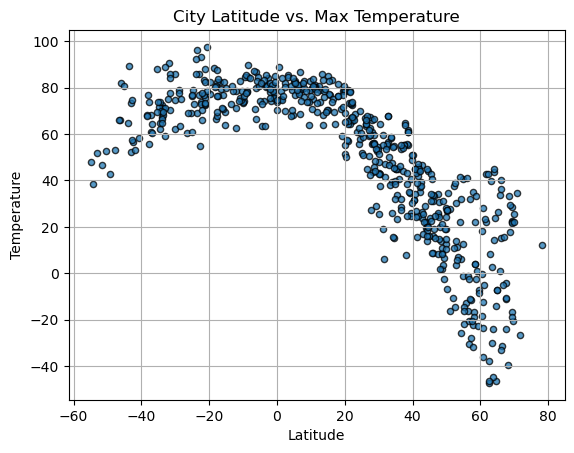

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o",s=20,alpha=.75, edgecolors="k")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature")

plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

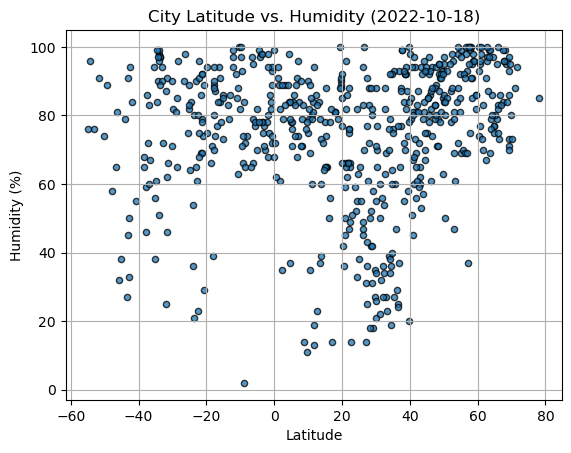

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o",s=20,alpha=.75, edgecolors="k")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity (2022-10-18)")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

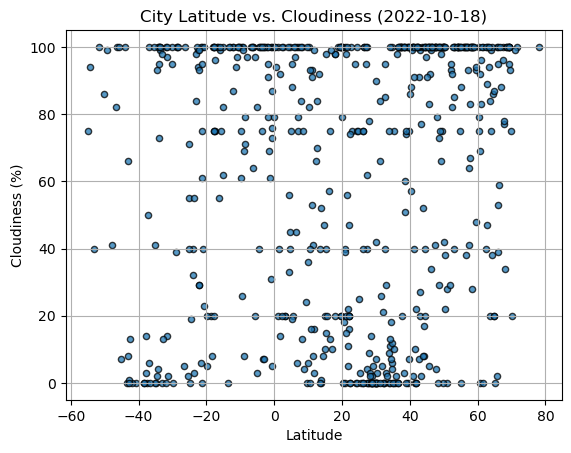

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o",s=20,alpha=.75, edgecolors="k")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (2022-10-18)")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

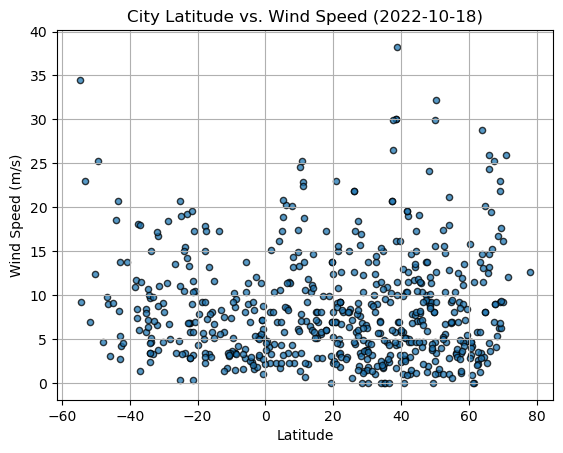

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o",s=20,alpha=.75, edgecolors="k")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed (2022-10-18)")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def linear_regress(x_values, y_values, regress_val, line_eq):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_val = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r-squared is: {rvalue**2}")
    print(max(x_values))
    print(max(y_values))
    plt.annotate(line_eq,xy=(min(x_values)+20,min(y_values)+20),fontsize=15,color="orange")
    plt.scatter(x_values,y_values,c='b')
    plt.plot(x_values,regress_val,"r-")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat']>=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,35.19,83,100,18.99,US,1704936588
1,isafjordur,66.0755,-23.1240,40.19,83,39,13.18,IS,1704937070
3,jinghong,21.9910,100.7341,65.84,47,16,1.79,CN,1704937071
5,tazovsky,67.4667,78.7000,-4.00,84,100,25.21,RU,1704937073
6,bodaybo,57.8506,114.1933,-22.29,99,83,1.12,RU,1704937073


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat']<0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,punta arenas,-53.1500,-70.9167,51.91,76,40,23.02,CL,1704937070
4,port-aux-francais,-49.3500,70.2167,42.76,89,99,25.23,TF,1704937072
7,woolgoolga,-30.1106,153.2007,86.04,71,95,9.13,AU,1704937074
9,saint-joseph,-21.3667,55.6167,75.58,79,61,11.61,RE,1704937075
10,grytviken,-54.2811,-36.5092,38.64,96,94,9.19,GS,1704937077


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7336926728335156
78.2186
89.01


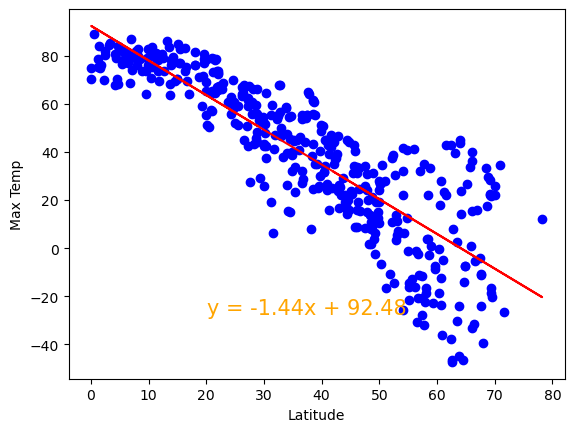

In [16]:
# Linear regression on Northern Hemisphere
regress_val = ''
line_eq = ''
linear_regress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], regress_val,line_eq)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

The r-squared is: 0.2734548126760739
-0.1303
97.61


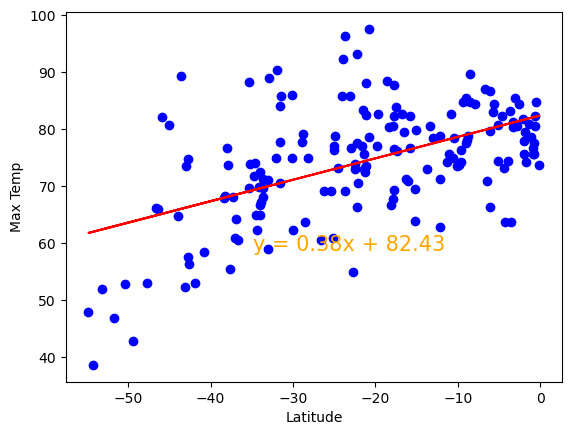

In [17]:
# Linear regression on Southern Hemisphere
regress_val = ''
line_eq = ''
linear_regress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], regress_val,line_eq)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.10340940843000407
78.2186
100


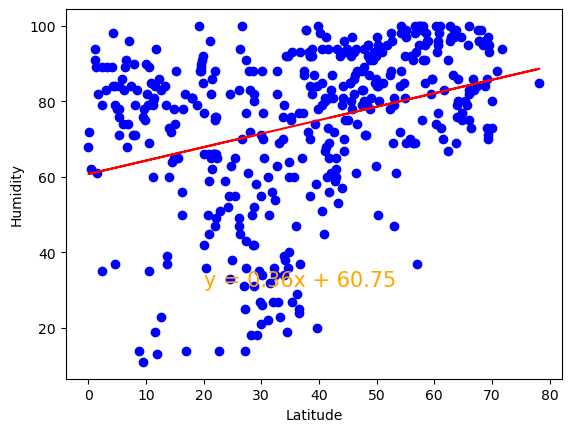

In [18]:
# Northern Hemisphere
regress_val = ''
line_eq = ''
linear_regress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], regress_val,line_eq)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

The r-squared is: 0.04800162299476556
-0.1303
100


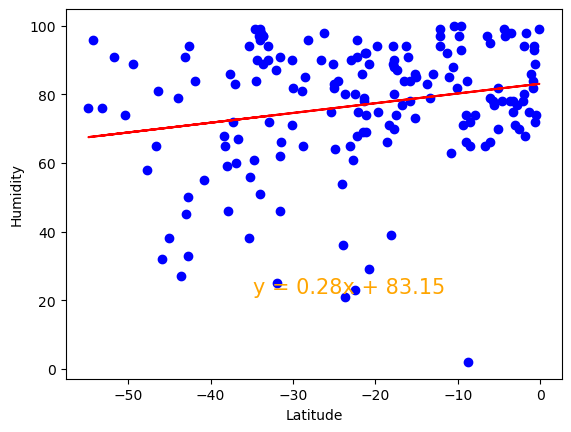

In [19]:
# Southern Hemisphere
regress_val = ''
line_eq = ''
linear_regress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], regress_val,line_eq)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.07361572542340289
78.2186
100


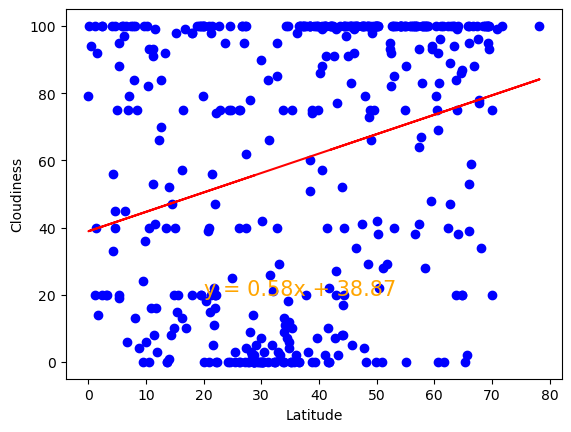

In [20]:
# Northern Hemisphere
regress_val = ''
line_eq = ''
linear_regress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], regress_val,line_eq)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The r-squared is: 0.07244589787318556
-0.1303
100


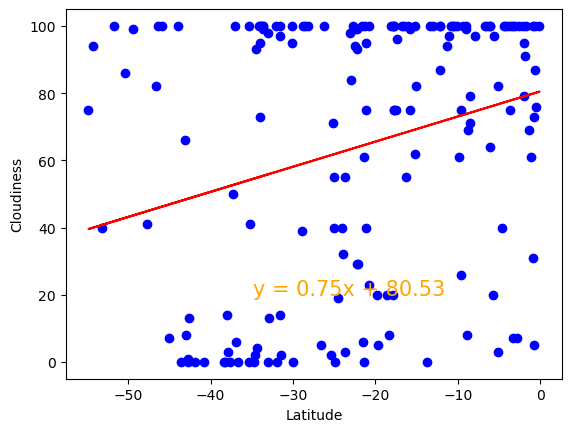

In [21]:
# Southern Hemisphere
regress_val = ''
line_eq = ''
linear_regress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], regress_val,line_eq)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.002060457170015933
78.2186
38.25


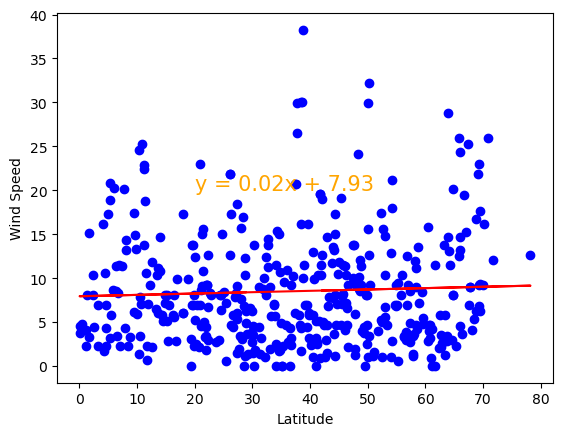

In [22]:
# Northern Hemisphere
regress_val = ''
line_eq = ''
linear_regress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], regress_val,line_eq)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

The r-squared is: 0.13479512426128756
-0.1303
34.52


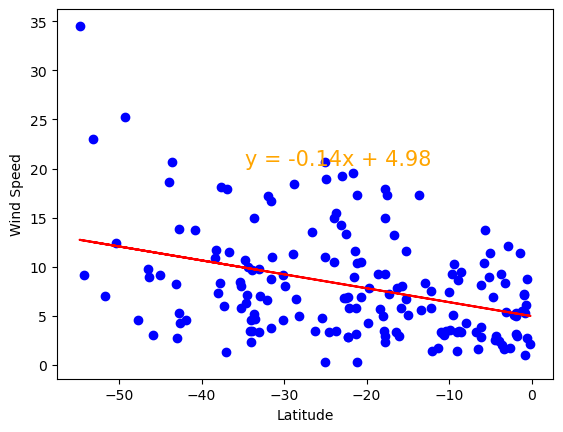

In [23]:
# Southern Hemisphere
regress_val = ''
line_eq = ''
linear_regress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], regress_val,line_eq)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE